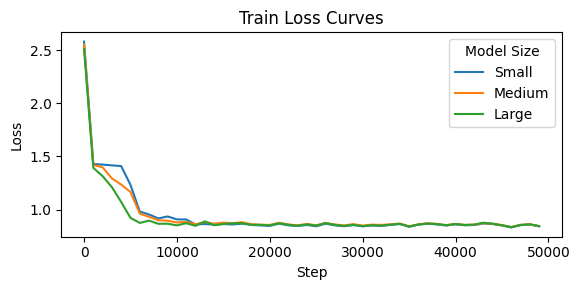

In [62]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorboard.backend.event_processing import event_accumulator

log_dir = "../runs"
# folder_pattern = "^gpt_add_.+_20250111-1[45].*$"

folder_name_mapping = {
    "gpt_add_120_32_2_2_32_20250111-145715": "Small",
    "gpt_add_120_32_2_2_64_20250111-152324": "Medium",
    "gpt_add_120_32_2_2_128_20250111-160153": "Large",
}

def extract_tensorboard_loss(log_dir):
    all_loss_data = []
    for folder, model_name in folder_name_mapping.items():
        folder_path = os.path.join(log_dir, folder)
        event_acc = event_accumulator.EventAccumulator(folder_path)
        event_acc.Reload()

        if 'Loss/Train' in event_acc.Tags().get('scalars', []):
            steps = []
            train_loss_values = []
            score_exact_values = []
            score_approx_values = []
            for scalar_event in event_acc.Scalars('Loss/Train'):
                steps.append(scalar_event.step)
                train_loss_values.append(scalar_event.value)
            for scalar_event in event_acc.Scalars('Score/Approx'):
                score_approx_values.append(scalar_event.value)
            for scalar_event in event_acc.Scalars('Score/Exact'):
                score_exact_values.append(scalar_event.value)
            if train_loss_values:
                loss_data = pd.DataFrame({
                    'Step': steps,
                    'Loss/Train': train_loss_values,
                    'Score/Exact': score_exact_values,
                    'Score/Approx': score_approx_values,
                    'Model': model_name
                })
                all_loss_data.append(loss_data)
    return pd.concat(all_loss_data, ignore_index=True)

loss_data = extract_tensorboard_loss(log_dir)

plt.figure(figsize=(6, 3))
sns.lineplot(data=loss_data, x="Step", y="Loss/Train", hue="Model", hue_order=["Small", "Medium", "Large"])
plt.title("Train Loss Curves")
plt.minorticks_off()
plt.xlabel("Step")
plt.ylabel("Loss")
plt.legend(title="Model Size", loc="upper right")
plt.grid(False)
plt.tight_layout()
plt.show()

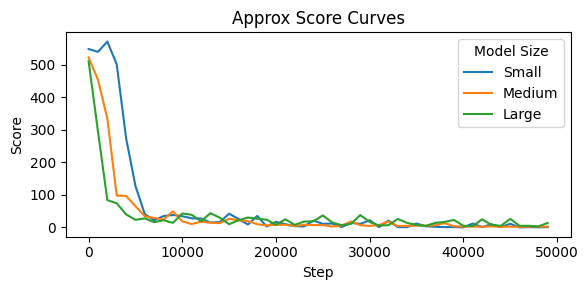

In [63]:

plt.figure(figsize=(6, 3))
sns.lineplot(data=loss_data, x="Step", y="Score/Approx", hue="Model",hue_order=["Small", "Medium", "Large"])
plt.title("Approx Score Curves")
plt.minorticks_off()
plt.xlabel("Step")
plt.ylabel("Score")
plt.legend(title="Model Size", loc="upper right")
plt.grid(False)
plt.tight_layout()
plt.show()

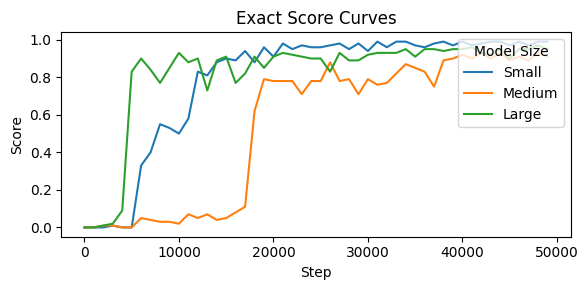

In [64]:

plt.figure(figsize=(6, 3))
sns.lineplot(data=loss_data, x="Step", y="Score/Exact", hue="Model", hue_order=["Small", "Medium", "Large"])
plt.title("Exact Score Curves")
plt.minorticks_off()
plt.xlabel("Step")
plt.ylabel("Score")
plt.legend(title="Model Size", loc="upper right")
plt.grid(False)
plt.tight_layout()
plt.show()

In [65]:
import torch
import torch.version
torch.__version__

'2.5.1'